In [161]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100

In [162]:
all_muts_df = pd.read_pickle("./data/4_8_df.pkl")
display(all_muts_df.shape)

(2820, 47)

In [163]:
cnt_d = dict()
cnt_d["mutations"] = len(all_muts_df)
cnt_d["experiments"] = len(all_muts_df.exp.unique())

In [164]:
cnt_d["mutated features"] = 0
for _, m in all_muts_df.iterrows():
    cnt_d["mutated features"] += len(m["genomic features"])
cnt_d

{'mutations': 2820, 'experiments': 35, 'mutated features': 4856}

In [165]:
COND_COLS = [
    'temperature',
    'carbon-source',
    'supplement',
    'strain-description',
    'taxonomy-id',
    'base-media',
    'nitrogen-source',
    'phosphorous-source',
    'sulfur-source',
    'calcium-source'
]

exp_ale_conds_df = all_muts_df[[
    "exp",
    "ale",
    ] + COND_COLS].copy()
exp_ale_conds_df = exp_ale_conds_df.drop_duplicates()
cnt_d["ALEs"] = len(exp_ale_conds_df)
exp_ale_conds_df = exp_ale_conds_df.rename(columns={"taxonomy-id": "organism"})

for col in COND_COLS:
    exp_ale_conds_df = exp_ale_conds_df.rename(columns={col: col.replace('-', ' ')})

exp_ale_conds_df["organism"] = exp_ale_conds_df.apply(lambda r: "E. coli K-12 MG1655" if r["organism"] == "511145" else r["organism"], axis=1)
exp_ale_conds_df = exp_ale_conds_df.rename(columns={"strain description": "strain"})
exp_ale_conds_df

,exp,ale,temperature,carbon source,supplement,strain,organism,base media,nitrogen source,phosphorous source,sulfur source,calcium source
0,42C,1,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
5,42C,2,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
40,42C,3,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
69,42C,4,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
77,42C,5,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
...,...,...,...,...,...,...,...,...,...,...,...,...
2753,tpi,0,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δtpi,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2757,tpi,13,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δtpi,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2775,tpi,14,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δtpi,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2789,tpi,15,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,Δtpi,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [166]:
# nondefault_supplements = [""]
# rename_d = {
#     "NaCl(0.5g/L) trace elements": "trace elements only",
#     "20uM FeSO4 and 10mM sodium citrate": "FeSO4, sodium citrate",
#     "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution.": "glycine, L-serine",
#     "KH2PO4(3) Na2HPO4(6.8)": "KH2PO4(3), Na2HPO4(6.8)",
#     "FeSO4(20uM), sodium citrate(10mM)": "FeSO4, sodium citrate"
# }

# exp_ale_conds_df["condition"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["condition"]=="NaCl(0.5g/L) trace elements" else r["condition"], axis=1)
exp_ale_conds_df["phosphorous source"] = exp_ale_conds_df.apply(lambda r: "KH2PO4(3), Na2HPO4(6.8)" if r["phosphorous source"] == "KH2PO4(3) Na2HPO4(6.8)" else r["phosphorous source"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["supplement"] == "NaCl(0.5g/L) trace elements" else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "glycine, L-serine" if r["supplement"] == "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution." else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["supplement"] == "20uM FeSO4 and 10mM sodium citrate" else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "FeSO4, sodium citrate" if r["supplement"] == "FeSO4(20uM), sodium citrate(10mM)" else r["supplement"], axis=1)

exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "monomethyl succinate(varying)" if r["carbon source"] == "monomethyl succinate" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "m-tartrate(varying)" if r["carbon source"] == "m-tartrate" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-lyxose(varying)" if r["carbon source"] == "D-lyxose" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-arabinose(varying)" if r["carbon source"] == "D-arabinose" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-2-deoxyribose(varying)" if r["carbon source"] == "D-2-deoxyribose" else r["carbon source"], axis=1)

exp_ale_conds_df

,exp,ale,temperature,carbon source,supplement,strain,organism,base media,nitrogen source,phosphorous source,sulfur source,calcium source
0,42C,1,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
5,42C,2,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
40,42C,3,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
69,42C,4,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
77,42C,5,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
...,...,...,...,...,...,...,...,...,...,...,...,...
2753,tpi,0,37 celsius,glucose(4),trace elements only,Δtpi,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
2757,tpi,13,37 celsius,glucose(4),trace elements only,Δtpi,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
2775,tpi,14,37 celsius,glucose(4),trace elements only,Δtpi,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
2789,tpi,15,37 celsius,glucose(4),trace elements only,Δtpi,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)


In [167]:
CONDITION_COLS = ['temperature', 'carbon source', 'supplement',
       'strain', 'organism', 'base media', 'nitrogen source',
       'phosphorous source', 'sulfur source', 'calcium source']

cond_cat_cnt_df = pd.DataFrame()
for cond_cat in CONDITION_COLS:
    for cond, cond_cat_sample_df in exp_ale_conds_df.groupby([cond_cat]):
        d = {"condition category": cond_cat, "condition": cond, "ALE count": len(cond_cat_sample_df)}
        cond_cat_cnt_df = cond_cat_cnt_df.append(d, ignore_index=True)
cond_cat_cnt_df

,ALE count,condition,condition category
0,30.0,30 celsius,temperature
1,168.0,37 celsius,temperature
2,10.0,42 celsius,temperature
3,1.0,D-2-deoxyribose(varying),carbon source
4,2.0,D-arabinose(varying),carbon source
5,2.0,D-lyxose(varying),carbon source
6,6.0,U-13C glucose(2),carbon source
7,4.0,acetate(4),carbon source
8,91.0,glucose(2),carbon source
9,53.0,glucose(4),carbon source


In [168]:
import pickle


with open('./data/annot_cnt_d.pkl', 'rb') as handle:
    uniqu_feat_cnt_d = pickle.load(handle)
    
tot_unique_item_cnt = 0
for v in uniqu_feat_cnt_d.values():
    tot_unique_item_cnt += v

cnt_d["genome annotations"] = tot_unique_item_cnt
cnt_d

{'mutations': 2820,
 'experiments': 35,
 'mutated features': 4856,
 'ALEs': 208,
 'genome annotations': 25321}

,count
genome annotations,25321
mutated features,4856
mutations,2820
ALEs,208
experiments,35


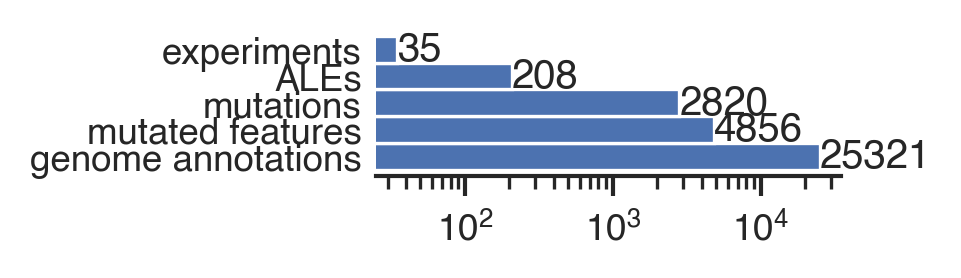

In [169]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


cnt_df = pd.DataFrame.from_dict(cnt_d, orient='index', columns=["count"
                                                               ])
cnt_df = cnt_df.sort_values(by="count", ascending=False)
display(cnt_df)

ax = cnt_df.plot.barh(
#     y="count",
#     x="index",
    color="#4C72B0",
#     color="#4169e1",
    figsize=(2,0.65),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["count"]))
    ax.text(r["count"], i-0.41,  s, fontname="Helvetica")

plt.savefig("./figs/AVA_mags.svg", format="svg")

,count
promoters,8617
genes,4694
intergenic regions,3744
transcription units,3560
operons,2619
attenuator terminators,752
regulons,493
terminators,306
TF binding sites,207
ribosomal binding sites,179


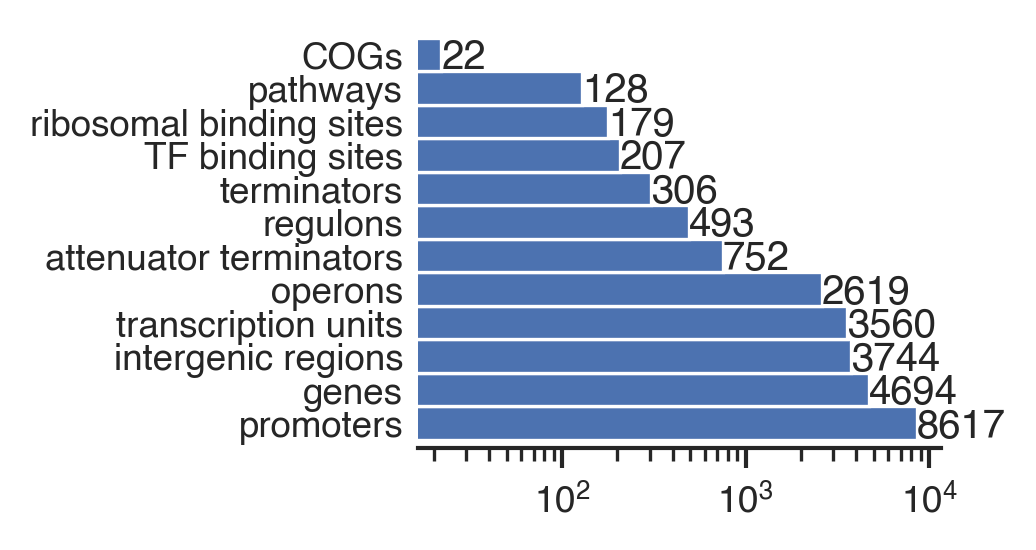

In [170]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


cnt_df = pd.DataFrame.from_dict(uniqu_feat_cnt_d, orient='index', columns=["count"])
cnt_df = cnt_df.sort_values(by="count", ascending=False)
display(cnt_df)

ax = cnt_df.plot.barh(
#     y="count",
#     x="index",
    color="#4C72B0",
#     color="#4169e1",
    figsize=(2.25,1.85),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["count"]))
    ax.text(r["count"], i-0.41,  s, fontname="Helvetica")

plt.savefig("./figs/AVA_annot_mags.svg", format="svg")

In [171]:
# cond_col_color_pal_d = {
#     "temperature": "PuOr_r",
#     "carbon source": "Greys_d",
#     "nitrogen source": "RdPu_d",
#     "sulfur source": "YlOrBr_d",
#     "phosphorous source": "YlOrRd_d",
#     "supplement": "PuBuGn_d",
#     "strain": "Greens_d",
#     "organism": "Purples_d",
#     "base media": "YlGnBu_d",
#     "calcium source": "bone",
# }

seaborn_palette = "muted"
pal = sns.palettes.SEABORN_PALETTES[seaborn_palette]

cond_col_color_pal_d = {
    "temperature": ["#E67E23", "#F1C40D", "#E74C3C"],
    "carbon source": "Greys_d",
    "supplement": "PuBuGn_d",
    "strain": "Greens_d",
    "nitrogen source": pal[6],
    "sulfur source": pal[8],
    "phosphorous source": pal[3],
    "organism": pal[4],
    "base media": pal[0],
    "calcium source": pal[5],
}


cond_cat_cnt_colors_df = pd.DataFrame()
for cond_cat, cond_cat_df in cond_cat_cnt_df.groupby(["condition category"]):
    df = cond_cat_df.copy()
    df = df.sort_values(by="ALE count", ascending=True)
    if cond_cat in ["temperature", "carbon source", "supplement", "strain"]:
        colors = sns.color_palette(cond_col_color_pal_d[cond_cat], len(df))
        colors.reverse()  # need to reverse to get the colors in order way I want them for ascending sized conditions.
        if cond_cat !=  "temperature":
            colors.reverse()
    else:
        colors = [cond_col_color_pal_d[cond_cat]]
    df["color"] = colors
    cond_cat_cnt_colors_df = cond_cat_cnt_colors_df.append(df, ignore_index=True)
cond_cat_cnt_colors_df.reset_index(inplace=True, drop=True)  # just making sure that the index is clean
cond_cat_cnt_colors_df["clustermap order"] = cond_cat_cnt_colors_df.index
cond_cat_cnt_colors_df

,ALE count,condition,condition category,color,clustermap order
0,208.0,M9,base media,#4878D0,0
1,208.0,CaCl2(0.1),calcium source,#8C613C,1
2,1.0,D-2-deoxyribose(varying),carbon source,"(0.2277124183006536, 0.2277124183006536, 0.227...",2
3,2.0,D-arabinose(varying),carbon source,"(0.2554248366013072, 0.2554248366013072, 0.255...",3
4,2.0,D-lyxose(varying),carbon source,"(0.2831372549019608, 0.2831372549019608, 0.283...",4
5,2.0,m-tartrate(varying),carbon source,"(0.31084967320261436, 0.31084967320261436, 0.3...",5
6,2.0,monomethyl succinate(varying),carbon source,"(0.338562091503268, 0.338562091503268, 0.33856...",6
7,3.0,glucose(4) or acetate(4),carbon source,"(0.36627450980392157, 0.36627450980392157, 0.3...",7
8,3.0,glucose(4) or glycerol(2.5),carbon source,"(0.39398692810457514, 0.39398692810457514, 0.3...",8
9,3.0,glucose(4) or xylose(4),carbon source,"(0.43250544662309365, 0.43250544662309365, 0.4...",9


In [172]:
cnt_d["conditions"] = len(cond_cat_cnt_colors_df["condition"].unique())

In [173]:
LEGEND_BARPLOT_WIDTH = 1.5

,count
mutated features,4856
mutations,2820
ALEs,208
conditions,44
experiments,35


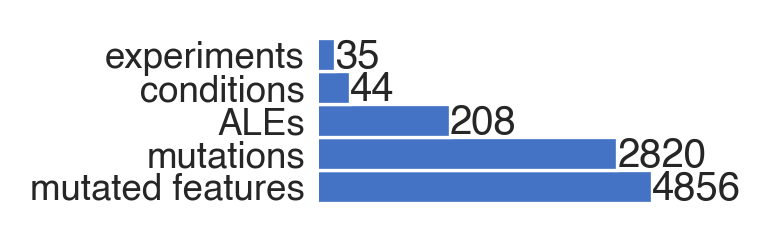

In [174]:
# This is specifically for the gdmuts MS, which doesn't need the number of genome annotations included

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")

d = cnt_d.copy()
del d["genome annotations"]
cnt_df = pd.DataFrame.from_dict(d, orient='index', columns=["count"
                                                               ])
cnt_df = cnt_df.sort_values(by="count", ascending=False)
display(cnt_df)

ax = cnt_df.plot.barh(
#     y="count",
#     x="index",
#     color="#4C72B0",
    color="#4472C4",
#     figsize=(2,0.65),
    figsize=(LEGEND_BARPLOT_WIDTH,0.8),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["count"]))
    ax.text(r["count"], i-0.41,  s, fontname="Helvetica")

plt.savefig("./figs/gdmuts_AVA_mags.svg", format="svg")

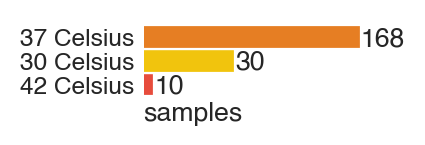

In [175]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
# sns.set_style("white")
sns.set_style("ticks")


CONDITION = "temperature"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace('celsius', "Celsius"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.55),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.35,  s, fontname="Helvetica")

plt.xscale('log')
ax.set_ylabel("")
ax.set_ylabel('', fontname="Helvetica")
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.xaxis.labelpad = -4
plt.xlabel('samples', x=0.21, fontname="Helvetica")


plt.xlim(right=cnt_d["ALEs"])
plt.savefig("./figs/f2d_1.svg", format="svg")

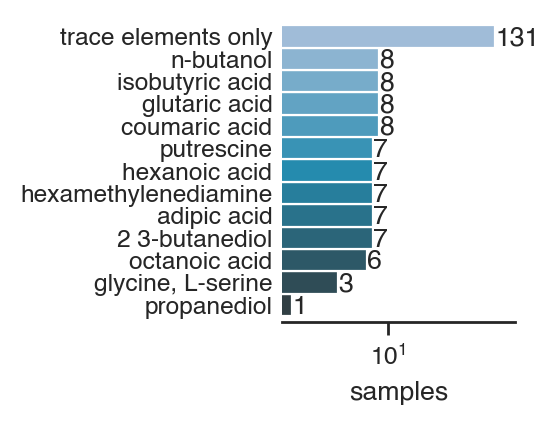

In [176]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


CONDITION = "supplement"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,2),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.39,  s, fontname="Helvetica")

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     length=0
# )
    
plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
ax.set_xlabel("samples", fontname="Helvetica")
plt.xlim(right=cnt_d["ALEs"])
plt.savefig("./figs/f2d_2.svg", format="svg")

(0.0, 208)

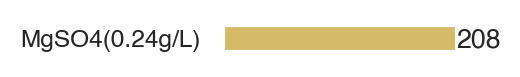

In [177]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "sulfur source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_3.svg", format="svg")

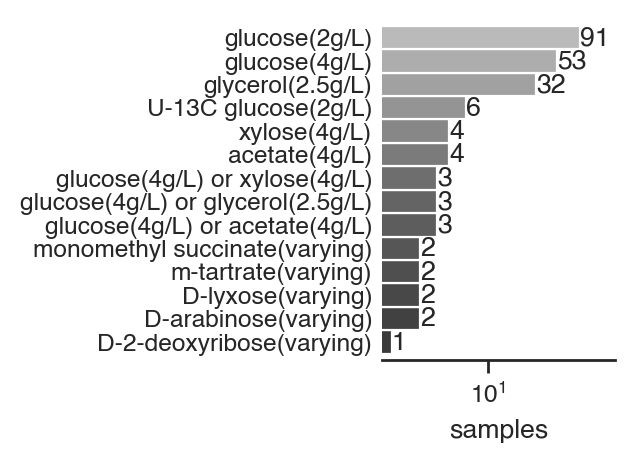

In [178]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


CONDITION = "carbon source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)") if "varying" not in r["condition"] else r["condition"], axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,2.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.xscale('log')
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     length=0
# )
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
ax.set_xlabel("samples", fontname="Helvetica")
ax.tick_params(axis='y', which='major', length=0)
plt.xlim(right=cnt_d["ALEs"])
plt.savefig("./figs/f2d_4.svg", format="svg")

(0.0, 208)

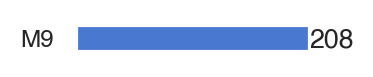

In [179]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "base media"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_5.svg", format="svg")

(0.0, 208)

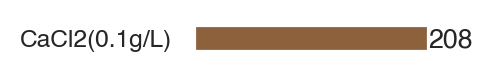

In [180]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "calcium source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_6.svg", format="svg")

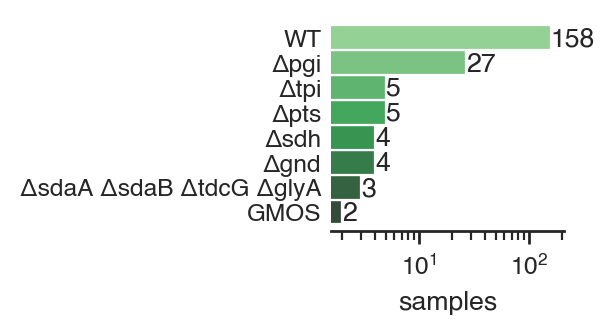

In [181]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


CONDITION = "strain"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,1.4),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.xscale('log')    
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     length=0
# )
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
ax.set_xlabel("samples", fontname="Helvetica")
ax.tick_params(axis='y', which='major', length=0)
plt.xlim(right=cnt_d["ALEs"])
plt.savefig("./figs/f2d_7.svg", format="svg")

(0.0, 208)

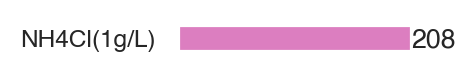

In [182]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "nitrogen source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_8.svg", format="svg")

(0.0, 208)

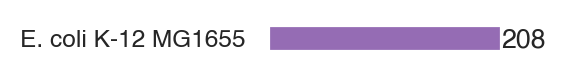

In [183]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "organism"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_9.svg", format="svg")

(0.0, 208)

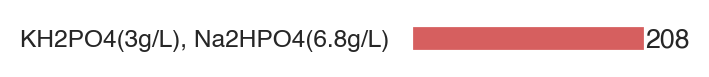

In [184]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "phosphorous source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_10.svg", format="svg")

# Clustermap

In [185]:
cond_to_val_map_d = dict()
for i, r, in cond_cat_cnt_colors_df.iterrows():
    cond_to_val_map_d[r["condition"]] = r["clustermap order"]
cond_to_val_map_d

{'M9': 0,
 'CaCl2(0.1)': 1,
 'D-2-deoxyribose(varying)': 2,
 'D-arabinose(varying)': 3,
 'D-lyxose(varying)': 4,
 'm-tartrate(varying)': 5,
 'monomethyl succinate(varying)': 6,
 'glucose(4) or acetate(4)': 7,
 'glucose(4) or glycerol(2.5)': 8,
 'glucose(4) or xylose(4)': 9,
 'acetate(4)': 10,
 'xylose(4)': 11,
 'U-13C glucose(2)': 12,
 'glycerol(2.5)': 13,
 'glucose(4)': 14,
 'glucose(2)': 15,
 'NH4Cl(1)': 16,
 'E. coli K-12 MG1655': 17,
 'KH2PO4(3), Na2HPO4(6.8)': 18,
 'GMOS': 19,
 'ΔsdaA ΔsdaB ΔtdcG ΔglyA': 20,
 'Δgnd': 21,
 'Δsdh': 22,
 'Δpts': 23,
 'Δtpi': 24,
 'Δpgi': 25,
 'WT': 26,
 'MgSO4(0.24)': 27,
 'propanediol': 28,
 'glycine, L-serine': 29,
 'octanoic acid': 30,
 '2 3-butanediol': 31,
 'adipic acid': 32,
 'hexamethylenediamine': 33,
 'hexanoic acid': 34,
 'putrescine': 35,
 'coumaric acid': 36,
 'glutaric acid': 37,
 'isobutyric acid': 38,
 'n-butanol': 39,
 'trace elements only': 40,
 '42 celsius': 41,
 '30 celsius': 42,
 '37 celsius': 43}

In [186]:
exp_ale_conds_colors_df = exp_ale_conds_df.copy()
exp_ale_conds_colors_df = exp_ale_conds_colors_df.drop(columns=["ale", "exp"])
for cond_col in CONDITION_COLS:
    exp_ale_conds_colors_df[cond_col] = exp_ale_conds_colors_df[cond_col].map(cond_to_val_map_d)

#     exp_ale_conds_colors_df[cond_col] = exp_ale_conds_colors_df[cond_col].map(cond_cat_val_d[cond_col])
exp_ale_conds_colors_df = exp_ale_conds_colors_df.T
# exp_ale_conds_colors_df

In [187]:
# # To set specific row order (ASW-1690)
exp_ale_conds_colors_df = exp_ale_conds_colors_df.reindex([
    'carbon source', 'supplement', 'strain', 'temperature',
    'organism', 'base media', 'nitrogen source', 'phosphorous source',
    'sulfur source', 'calcium source'])
# exp_ale_conds_colors_df

In [188]:
exp_ale_conds_colors_df

,0,5,40,69,77,85,126,134,190,196,204,220,222,226,233,237,250,347,355,375,383,399,418,423,429,451,456,461,463,467,469,472,476,480,485,496,502,506,510,513,517,519,523,530,535,537,541,554,556,558,...,2274,2284,2294,2307,2318,2326,2338,2346,2367,2382,2398,2422,2435,2452,2458,2471,2475,2481,2491,2502,2506,2520,2531,2546,2556,2571,2587,2597,2607,2615,2621,2632,2640,2649,2657,2665,2671,2675,2688,2697,2710,2722,2726,2736,2746,2753,2757,2775,2789,2803
carbon source,14,14,14,14,14,14,14,14,14,14,12,12,12,12,12,12,14,14,14,14,14,14,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,...,15,15,15,15,15,15,15,15,15,15,15,15,15,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
supplement,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,...,30,30,30,30,30,28,35,35,35,35,35,35,35,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
strain,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26,26,26,26,19,19,21,21,21,21,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,23,23,23,23,23,22,22,22,22,24,24,24,24,24
temperature,41,41,41,41,41,41,41,41,41,41,43,43,43,43,43,43,43,43,43,43,43,43,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,...,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
organism,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
base media,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nitrogen source,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
phosphorous source,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
sulfur source,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
calcium source,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


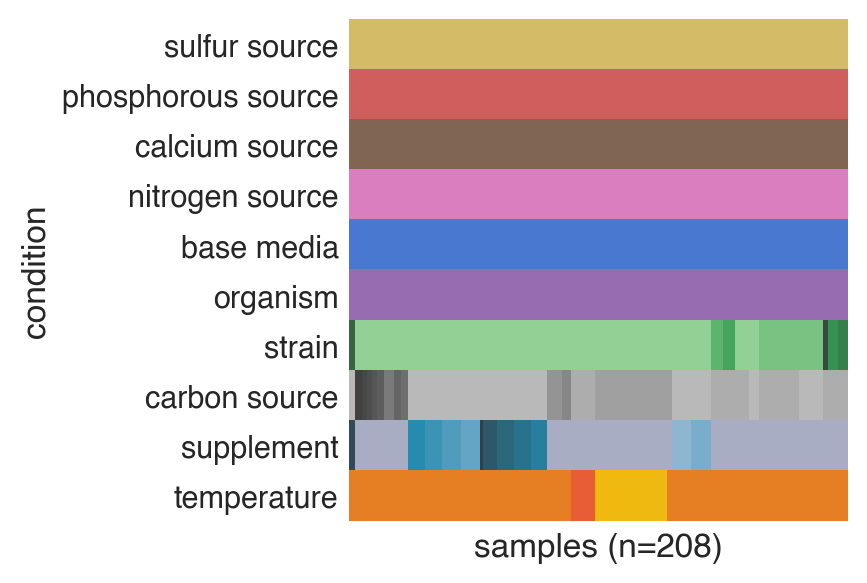

In [189]:
# TODO: use helvetica
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("whitegrid")
import matplotlib.colors as mcolors
sns.set(font="Helvetica")

all_colors = list(cond_cat_cnt_colors_df["color"])
all_colors
cmap = mcolors.LinearSegmentedColormap.from_list('n', all_colors)

df = exp_ale_conds_colors_df.copy()

# explicitely setting the clustermap row order
df = df.reindex([
    "sulfur source",
    "phosphorous source",
    "calcium source",
    "nitrogen source",
    "base media",
    "organism",
    "strain",
    "carbon source",
    "supplement",
    "temperature",
])

g = sns.clustermap(
    df,
    xticklabels=False,
    row_cluster=False,  # # To set specific row order (ASW-1690)
#     yticklabels=False,
    cmap=cmap,
#     figsize=(5,10),  # height used with initial
    figsize=(5,3.5),
    linewidths=0,
)

# Fix for recent matplotlib/seaborn issue
g.ax_heatmap.set_ylim(len(exp_ale_conds_colors_df)+0, -0)

   
# dispaly(clustergrid.dendrogram_row.reordered_ind)
# display(g.dendrogram_row.reordered_ind)

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_visible(False)
g.ax_heatmap.yaxis.set_ticks_position('left')
g.ax_heatmap.yaxis.set_label_position("left")
g.ax_heatmap.tick_params(axis='both', which='both', length=0)
# g.ax_heatmap.set_title("Sample condition clustering", y=1.1, fontname="Helvetica")

g.ax_heatmap.set_xlabel("samples (n=" + str(cnt_d["ALEs"]) + ")", fontname="Helvetica")
g.ax_heatmap.set_ylabel("condition", fontname="Helvetica")
# turn off Dark Reader, set DPI = 300, and copy-paste into SVG for f2v2.
# !!! TODO: Potential solution for getting white lines out of PDF/SVG for clustermap: https://stackoverflow.com/questions/27092991/white-lines-in-matplotlibs-pcolor
plt.savefig("./figs/cond_clust.svg", format="svg")  # or try PDF according to the above stackoverflow potential solution.

In [190]:
MUT_DESCRIPTORS = ["Position", "Mutation Type", "Details", "Sequence Change", "mutation target annotation"]


exp_mut_cnt_df = pd.DataFrame()
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutations",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": len(exp_mut_df),
    }, ignore_index=True)
    
    df = exp_mut_df[MUT_DESCRIPTORS].copy()
    df = df.drop_duplicates()
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutations",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": len(df),
    }, ignore_index=True)

In [191]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = dict()
    for _, r in exp_mut_df.iterrows():
        for feat_d in r["genomic features"]:
            feat = feat_d["RegulonDB ID"]
            if feat not in feat_cnt_d.keys():
                feat_cnt_d[feat] = 0
            feat_cnt_d[feat] += 1
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated genomic features",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated genomic features",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [192]:
# currently returns the RegulonDB IDs, but that's fine since just currently getting counts.
def _get_feat_cnt_d(mut_df, feat_link_d_col):
    feat_cnt_d = dict()
    for _, r in mut_df.iterrows():
        for feat, links in r[feat_link_d_col].items():
            if feat not in feat_cnt_d.keys():
                feat_cnt_d[feat] = 0
            feat_cnt_d[feat] += len(links)
    return feat_cnt_d

for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "genetic feature links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated genetic features",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated genetic features",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [193]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "operon links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated operons",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index="unique")
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated operons",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [194]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "regulator links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated regulons",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated regulons",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "pathway links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated pathways",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated pathways",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [ ]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "COG links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated COGs",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated COGs",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [ ]:
for t, type_df in exp_mut_cnt_df.groupby(["type"]):
    print("all", t, np.median(type_df[type_df["per experiment"]=="all"]["mutation count"]))
    print("unique", t, np.median(type_df[type_df["per experiment"]=="unique"]["mutation count"]))

In [ ]:
exp_mut_cnt_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.5},
    'whiskerprops': {'color': 'k', 'linewidth': 0.5},
#     'medianprops': {'color': 'orange', 'linewidth': 1},
    'medianprops': {'color': 'k', 'linewidth': 0.5},
    'capprops': {'color': 'k', 'linewidth': 0.5},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}


plt.figure(figsize=(3, 2.5))
ax = sns.boxplot(data=exp_mut_cnt_df,
                 x="mutation count",
                 y="type",
                 hue="per experiment",
                 width=0.5,
#                  color="white",
#                  order=FEAT_ORDER_L,
                 **boxplot_kwargs)
# plt.xscale('log')
plt.xlim(0, None)
# plt.xlim(0, 1000)

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")
ax.set_xlabel("count per experiment", fontname="Helvetica")
ax.set_ylabel("", fontname="Helvetica")

import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Helvetica', style='normal',)
ax.legend(prop=font).set_title('per experiment', prop=font)
plt.savefig("./figs/f2b.svg", format="svg")

In [ ]:
print(np.median(exp_mut_cnt_df[(exp_mut_cnt_df["type"]=="mutations") & (exp_mut_cnt_df["per experiment"]=="all")]["mutation count"]))
print(np.median(exp_mut_cnt_df[(exp_mut_cnt_df["type"]=="mutations") & (exp_mut_cnt_df["per experiment"]=="unique")]["mutation count"]))
print(np.median(exp_mut_cnt_df[(exp_mut_cnt_df["type"]=="mutated genomic features") & (exp_mut_cnt_df["per experiment"]=="all")]["mutation count"]))

In [ ]:
exp_mut_cnt_df["experiment name"].unique()

In [ ]:
# check for ASW-1628
# Genetic feature mutation counts being higher than genomic feature mutation counts has proven in the past to be problemmatic.
# The below code checks for these types of problems.
# tdf = exp_mut_cnt_df[(exp_mut_cnt_df["per experiment"]=="all")&(exp_mut_cnt_df["type"].isin(["mutated genomic features", "mutated genetic features"]))]
# for e, df in tdf.groupby(["experiment name"]):
#     for _, r in df.iterrows():
#         print(r["experiment name"] + " " + r["type"] + " " + str(r["mutation count"]))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.5},
    'whiskerprops': {'color': 'k', 'linewidth': 0.5},
#     'medianprops': {'color': 'orange', 'linewidth': 1},
    'medianprops': {'color': 'k', 'linewidth': 0.5},
    'capprops': {'color': 'k', 'linewidth': 0.5},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}


plt.figure(figsize=(3, 2))
ax = sns.boxplot(data=exp_mut_cnt_df[exp_mut_cnt_df["per experiment"]=="unique"],
                 x="mutation count",
                 y="type",
                 width=0.5,
#                  color="white",
#                  order=FEAT_ORDER_L,
                 **boxplot_kwargs)
# plt.xscale('log')
plt.xlim(0, None)
# plt.xlim(0, 1000)

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")
ax.set_xlabel("count per experiment", fontname="Helvetica")
ax.set_ylabel("", fontname="Helvetica")

import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Helvetica', style='normal',)
ax.legend(prop=font).set_title('per experiment', prop=font)
plt.savefig("fig.svg", format="svg")

In [ ]:
all_muts_df["mutation genomic feature count"] = all_muts_df.apply(lambda r: len(r["genomic features"]), axis=1)
all_muts_df

In [ ]:
mut_types = all_muts_df["Mutation Type"].unique()
mut_type_cnt_df = pd.DataFrame()
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    for mt in mut_types:
        if mt in exp_mut_df["Mutation Type"].unique():
            cnt = len(exp_mut_df[exp_mut_df["Mutation Type"]==mt])
        else:
            cnt = 0
        mut_type_cnt_df = mut_type_cnt_df.append({
            "mutation type": mt,
            "experiment": exp,
            "count": cnt,
        }, ignore_index=True)
mut_type_cnt_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.5},
    'whiskerprops': {'color': 'k', 'linewidth': 0.5},
#     'medianprops': {'color': 'orange', 'linewidth': 1},
    'medianprops': {'color': 'k', 'linewidth': 0.5},
    'capprops': {'color': 'k', 'linewidth': 0.5},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}


plt.figure(figsize=(2, 1.25))
ax = sns.boxplot(data=mut_type_cnt_df,
                 x="count",
                 y="mutation type",
#                  hue="experiment",
                 width=0.5,
#                  color="white",
#                  order=FEAT_ORDER_L,
                 **boxplot_kwargs)
plt.xscale('log')
# plt.xlim(0, None)

# for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
# for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")
# ax.set_xlabel("count per experiment", fontname="Helvetica")
# ax.set_ylabel("", fontname="Helvetica")

# import matplotlib.font_manager as font_manager
# font = font_manager.FontProperties(family='Helvetica', style='normal',)
# ax.legend(prop=font).set_title('per experiment', prop=font)
# plt.savefig("fig.svg", format="svg")

In [ ]:
mut_types = all_muts_df["Mutation Type"].unique()
single_or_multi_feat_mut_cnt_df = pd.DataFrame()
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    
    multi_feat_mut_df = exp_mut_df[exp_mut_df["mutation genomic feature count"]>1]
    
    single_or_multi_feat_mut_cnt_df = single_or_multi_feat_mut_cnt_df.append({
        "genomic features per mutation": "single feature mutation",
        "experiment": exp,
        "mutation count": len(exp_mut_df) - len(multi_feat_mut_df),
    }, ignore_index=True)
    
    single_or_multi_feat_mut_cnt_df = single_or_multi_feat_mut_cnt_df.append({
        "genomic features per mutation": "multiple feature mutation",
        "experiment": exp,
        "mutation count": len(multi_feat_mut_df),
    }, ignore_index=True)
    
display(np.median(single_or_multi_feat_mut_cnt_df[single_or_multi_feat_mut_cnt_df["genomic features per mutation"]=="single feature mutation"]["mutation count"]))
display(np.median(single_or_multi_feat_mut_cnt_df[single_or_multi_feat_mut_cnt_df["genomic features per mutation"]=="multiple feature mutation"]["mutation count"]))
    
# single_or_multi_feat_mut_cnt_df.head()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.5},
    'whiskerprops': {'color': 'k', 'linewidth': 0.5},
#     'medianprops': {'color': 'orange', 'linewidth': 1},
    'medianprops': {'color': 'k', 'linewidth': 0.5},
    'capprops': {'color': 'k', 'linewidth': 0.5},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}


plt.figure(figsize=(2.5, 0.75))
ax = sns.boxplot(data=single_or_multi_feat_mut_cnt_df,
                 x="mutation count",
                 y="genomic features per mutation",
                 width=0.5,
                 color="white",
#                  order=FEAT_ORDER_L,
                 **boxplot_kwargs)
plt.xscale('log')
# plt.xlim(0, None)

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")
ax.set_xlabel("count per experiment", fontname="Helvetica")
ax.set_ylabel("", fontname="Helvetica")

# import matplotlib.font_manager as font_manager
# font = font_manager.FontProperties(family='Helvetica', style='normal',)
# ax.legend(prop=font).set_title('per experiment', prop=font)
plt.savefig("fig.svg", format="svg")
plt.show()